# King County House Data Analysis

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time: 
- Instructor name: Claude Fried
- Blog post URL: https://ginaturan.blogspot.com/2022/05/linear-regression-in-datascience.html

<img align="center" width="600" height="300" src='images/kc_homes.jpg'>

## Overview

> The King County Real State Agency that helps homeowners buy and/or sell homes.The Real State agency need an advice to homeowners about what are the impact on the house prices.

## Business Understanding

<img align="center" width="600" height="100" src='images/buyerseller.jpg'>

In this analyis I will focus on the helping Real state Agency finding what indicater drive prices in house market. 

## Data Understanding

The King County Sales Data covers most of the aspect that may impact on the house prices. Such as house prices, square feet living, bedrooms and batrooms etc. In the data I will start with Linear Regression basic model, evaluate it, and then I will provide justification for and proceed to a new model. Based on the results, I will discuss two features that have strong relationships with housing prices. What are the impact on the house prices?

In [1]:
# importing necessary library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('seaborn')
sns.set_theme()
style.use('ggplot')
%matplotlib inline

In [2]:
kc_df = pd.read_csv('data/kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
kc_df.shape

(21597, 21)

In [4]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data cleaning

The best way to start an analyzing is cleaning the data. I went through all the columns and datatypes I 

In [6]:
#inspect each column
for val in kc_df:
    print(kc_df[val].value_counts())
    print()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/15/2015      1
5/17/2014      1
5/27/2015      1
3/8/2015       1
5/24/2015      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      7

In [7]:
#drop some column
kc_df = kc_df.drop(['id','date', 'zipcode'], axis=1)

In [8]:
kc_df['sqft_basement'].unique() # checking the unique value in the column

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [9]:
# dropping row with '?' 
kc_df = kc_df[kc_df.sqft_basement != '?']

In [10]:
#converting sqft_basement column str to float
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype("float")

In [11]:
# to check the datatypes
kc_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Exploring Null  (NaN) Values

In [12]:
# checking if is there any Null values in the dataset
kc_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# summary statistics of view column
kc_df.view.describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [14]:
#since the median value is "zero". I decide to replace Null values with median value
kc_df.view = kc_df.view.fillna(value=kc_df.view.median())

In [15]:
# to check how many houses are waterfront
kc_df.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [16]:
# there are 142 houses waterfront.So, I replace the Null value with median
kc_df.waterfront = kc_df.waterfront.fillna(value=kc_df.waterfront.median())

In [17]:
kc_df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [18]:
# median value of the column yr_renovated is also zero.So we can replace the Null value in median value
kc_df.yr_renovated = kc_df.yr_renovated.fillna(value=kc_df.yr_renovated.median())

In [19]:
# Lets check our data null values again
kc_df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Data Exploring

In [20]:
#sort the data by price descending order to see highest price of the house
kc_df.sort_values('price', ascending = False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,47.6298,-122.323,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,47.6500,-122.214,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,47.6305,-122.240,4540,42730
4407,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,0.0,47.6289,-122.233,3560,24345
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,47.6232,-122.220,4600,21750
1313,5300000.0,6,6.00,7390,24829,2.0,1.0,0.0,4,12,5000,2390.0,1991,0.0,47.5631,-122.210,4320,24619
1162,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,47.6767,-122.211,3430,26788
8085,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,47.5570,-122.210,3270,10454
2624,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290.0,2004,0.0,47.7493,-122.280,3030,23408
8629,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,0.0,2001,0.0,47.6208,-122.219,3720,14592


In [21]:
# to see the lowest price houses in the data
kc_df.sort_values('price', ascending = False).tail(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
13743,86500.0,3,1.00,840,9480,1.0,0.0,0.0,3,6,840,0.0,1960,0.0,47.3277,-122.341,840,9420
16700,85000.0,2,1.00,910,9753,1.0,0.0,0.0,3,5,910,0.0,1947,0.0,47.3897,-122.236,1160,7405
10242,85000.0,2,1.00,830,9000,1.0,0.0,0.0,3,6,830,0.0,1939,0.0,47.3813,-122.243,1160,7680
3763,84000.0,2,1.00,700,20130,1.0,0.0,0.0,3,6,700,0.0,1949,0.0,47.4752,-122.271,1490,18630
18453,83000.0,2,1.00,900,8580,1.0,0.0,0.0,3,5,900,0.0,1918,0.0,47.4727,-122.270,2060,6533
2139,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,47.4799,-122.296,1572,10570
8267,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,47.4987,-122.341,1140,11250
16184,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,730,0.0,1943,0.0,47.4808,-122.315,860,9000
465,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,0.0,47.6499,-121.909,1200,7500
15279,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,0.0,47.4739,-122.280,1700,10387


In [22]:
# looking at the avarage dataset table
kc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21143.0,540510.727428,368075.064375,78000.0000,322000.00000,450000.000,645000.0000,7.700000e+06
bedrooms,21143.0,3.372558,0.924917,1.0000,3.00000,3.000,4.0000,3.300000e+01
bathrooms,21143.0,2.116079,0.768531,0.5000,1.75000,2.250,2.5000,8.000000e+00
sqft_living,21143.0,2080.920730,918.547562,370.0000,1430.00000,1910.000,2550.0000,1.354000e+04
sqft_lot,21143.0,15087.137823,41209.200078,520.0000,5043.00000,7620.000,10695.5000,1.651359e+06
floors,21143.0,1.493591,0.539249,1.0000,1.00000,1.500,2.0000,3.500000e+00
waterfront,21143.0,0.006716,0.081679,0.0000,0.00000,0.000,0.0000,1.000000e+00
view,21143.0,0.232654,0.764064,0.0000,0.00000,0.000,0.0000,4.000000e+00
condition,21143.0,3.409923,0.650498,1.0000,3.00000,3.000,4.0000,5.000000e+00
grade,21143.0,7.658279,1.174253,3.0000,7.00000,7.000,8.0000,1.300000e+01


### Distributions

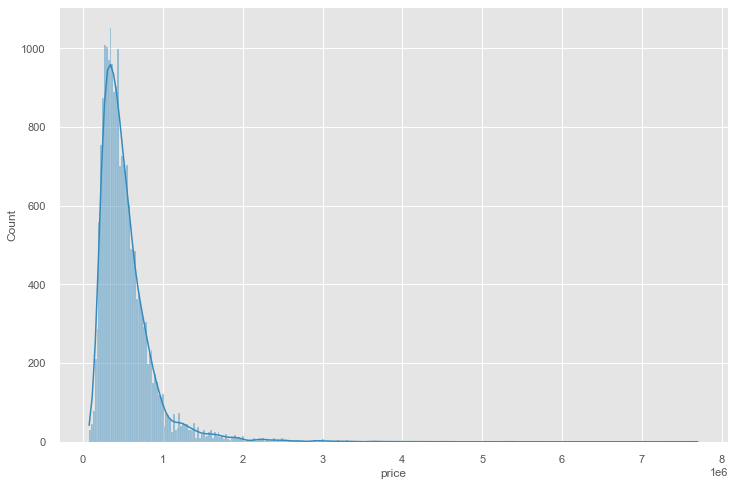

In [23]:
# house and price Distiribution
plt.figure(figsize = (12,8))
sns.histplot(kc_df['price'], kde=True);
#plt.savefig('home_price_dist')

> Basic distribution plot shows the most properties below 1 millon price. Over 1 million price houses just a few. Over two million houses are very rare. checking the transpose table mean value house 540,510 price range.In case of errors that when I start to model some of the result that I might get a lot of errors.

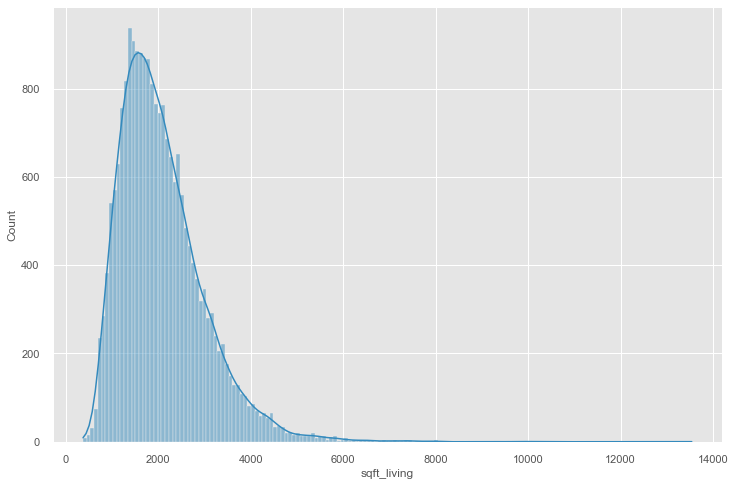

In [24]:
# living space Distribution
plt.figure(figsize = (12,8))
sns.histplot(kc_df['sqft_living'], kde=True);
#plt.savefig('sqftliving_dist')

> There are some outliers here.There are some big sqft houses.The avarage house living spaces around 2000 sqft.

C:\Users\ginat\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


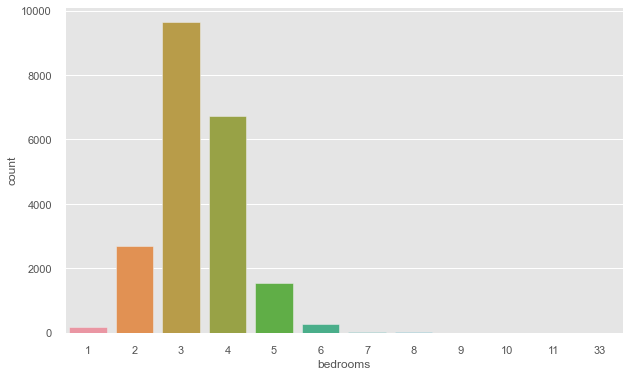

In [25]:
# checking bedrooms distribution
plt.figure(figsize = (10,6))
sns.countplot(kc_df['bedrooms']);
#plt.savefig('bedroom_number')

> According to dataset tpically home has 3 to 4 bedrooms. Other rooms count way less then the avarage.

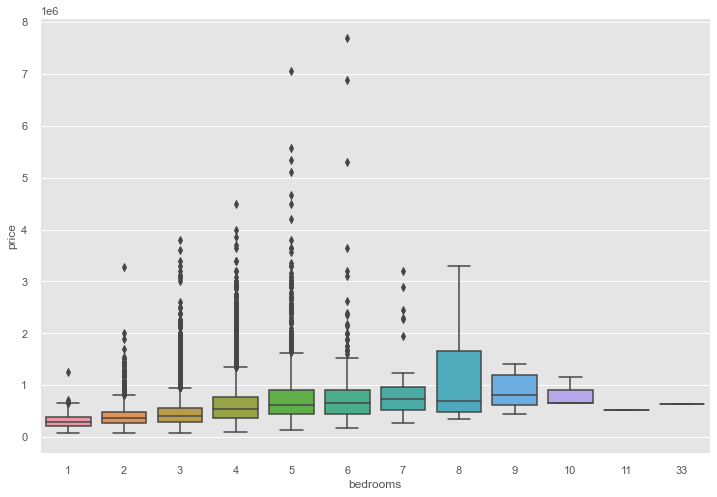

In [26]:
# checking price and bedrooms relationship
plt.figure(figsize= (12,8))
sns.boxplot(x='bedrooms', y='price', data=kc_df);

> Looking at the bedroom and price distribution. There are 33 ans 11 bedrooms houses and it seems like there is a outlier.I assume there is a positive correlation between bedroom and house.

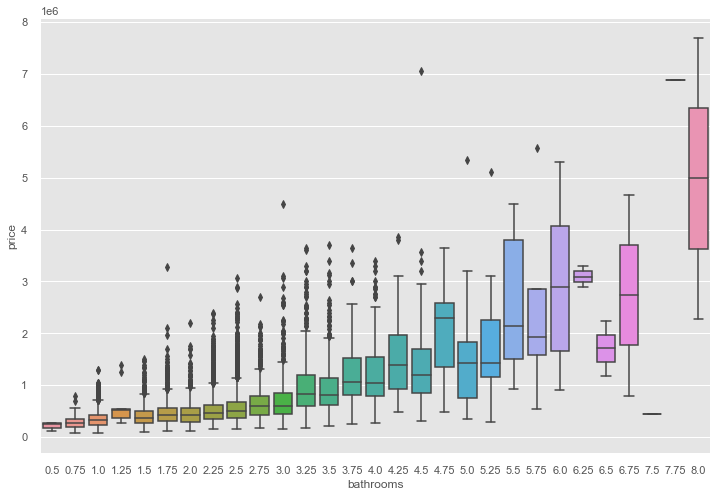

In [27]:
# checking price and bedrooms relationship
plt.figure(figsize= (12,8))
sns.boxplot(x='bathrooms', y='price', data=kc_df);

> It seems like bathroom are correlated with higher pricing. More bathrooms you have the more expencive the property becomes. Stronger correlations look like.

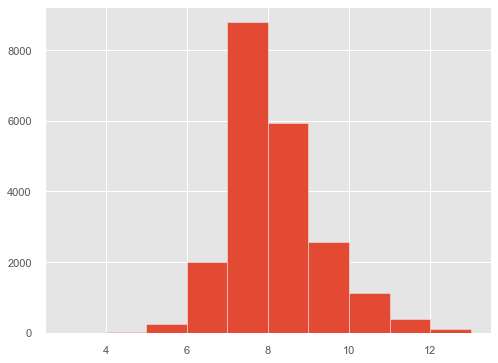

In [28]:
# grade distribution on histogram (check the transpose table for result)
plt.figure(figsize= (8,6))
kc_df['grade'].hist()
#plt.savefig('grade_system')
plt.show()

> In Kings County there is a grading system.The data set shows the grading between the number 1 to 13.

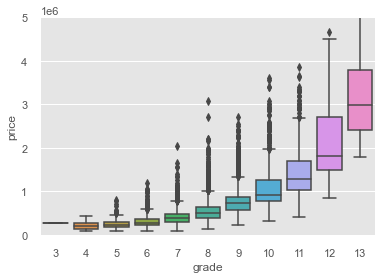

In [29]:
# checking relationship between price and grade
fig = sns.boxplot(x='grade', y='price', data=kc_df)
fig.axis(ymin=0, ymax= 5000000);

> There is a relationship between the grade and price of the proprerty. Higher the grade, higher the price.

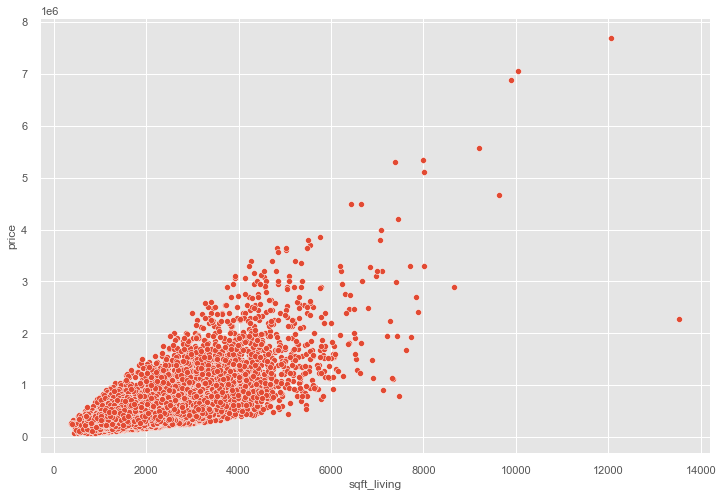

In [30]:
#living space
plt.figure(figsize = (12,8))
sns.scatterplot(x='sqft_living', y='price', data=kc_df);
#plt.savefig('living_price')

> As we increased the living space of the house, value of the property price goes up.There is a outlier that may put better fit down in linear regression model.

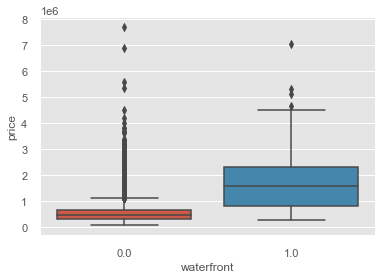

In [31]:
# waterfront
sns.boxplot(x= 'waterfront', y='price', data=kc_df);

As we see here waterfront properties seems like effected on the prices. The median value shows there are some properties with waterfront that in price range.

### Location /  Latitude & Longitude 

<img align="left" width="600" height="100" src='images/kc_seattle_map.png'>

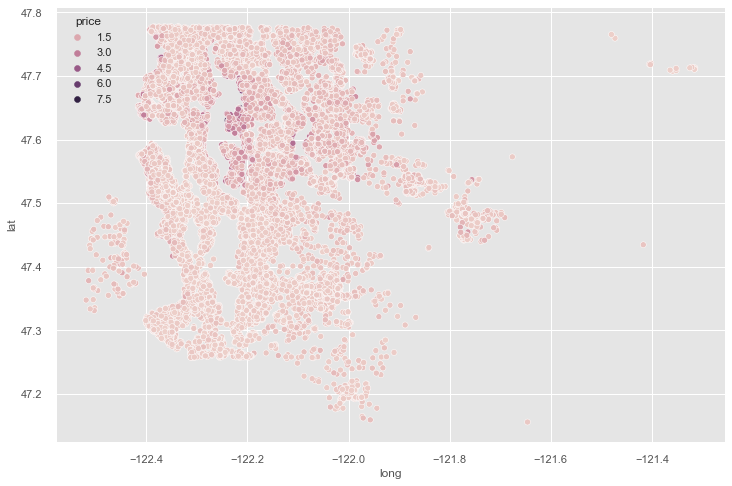

In [32]:
#longitude and latitude 
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=kc_df, hue='price');
plt.savefig('Location')

> Looking at the Lattiute and longitute coordinates of the properties on scatterplot darker color shows the highest prices of the properties and they are mostly close to water.It seems waterfront is a criteria of the purchasing properties.

### Correlation 

In [33]:
corr = kc_df.corr()
corr.shape

(18, 18)

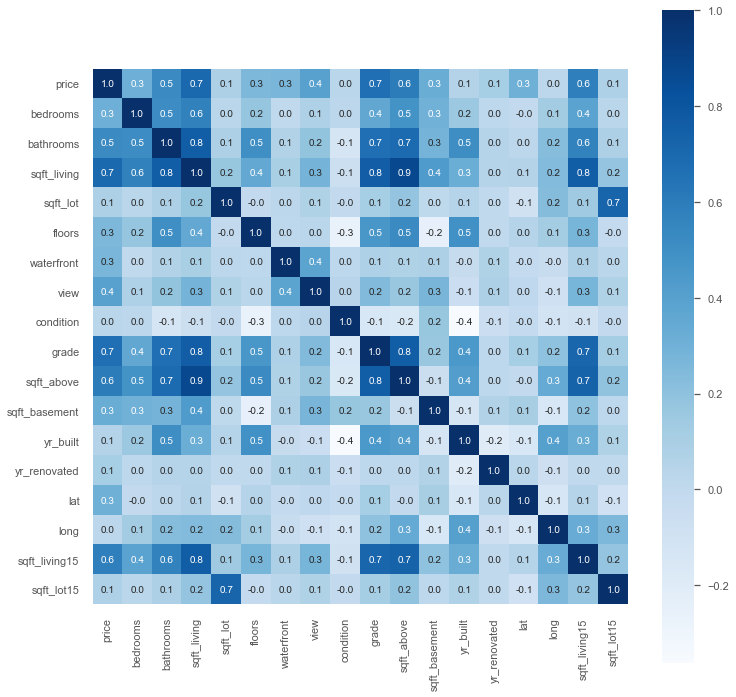

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues');
plt.savefig('heatmap')

> Looking the correlation matrix of the data I will answer what is the target realtionship with variables. In the heatmap darker the color is maximum the correlation. The price(target variable) has high correlation with, bedrooms, bathrooms, sqft_living, floors, waterfront, view,  grade, sqft_above, sqft_above, lat and sqft_living15.

### Multicolinearity

In [35]:
# Limit the display columns 
pd.options.display.max_columns = 999

# create numerical variable list
numeric_vars = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                'sqft_lot15']

In [36]:
kc_df_preprocessed = kc_df.loc[:, numeric_vars]
kc_df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


In [37]:
# cheking correlation with an absolute value around
abs(kc_df_preprocessed.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [38]:
# saving the absolute value of correlation matrix as a data frame
kc_df = kc_df_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns in a new column
kc_df['pairs'] = list(zip(kc_df.level_0, kc_df.level_1))
#set the index
kc_df.set_index(['pairs'], inplace = True)
#d rop level colums
kc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
kc_df.columns = ['cc']
# dropped the dublicates
kc_df.drop_duplicates(inplace=True)

kc_df[(kc_df.cc>.75) & (kc_df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876678
"(sqft_living, grade)",0.763101
"(sqft_living, sqft_living15)",0.756389
"(grade, sqft_above)",0.756382
"(bathrooms, sqft_living)",0.755278


>There are five sets of variables that are highly correlated.Since, I have so many square feet refering column and looking at the column description it seems like sqft_above and sqft_living almost the same.So, I decided to drop sqft_living column.Next I will try to create a base model according to correlation.

In [39]:
#drop high correlated column
kc_df_preprocessed = kc_df_preprocessed.drop(['sqft_living'], axis=1)
kc_df_preprocessed

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


## Basic Linear Model

> After dropping one highest correlated column, let's see other highest correlation columns with target variable to build Basic Linear Model

In [40]:
#basic linear model
X =kc_df_preprocessed['sqft_above']
y = kc_df_preprocessed['price']
basicmodel = sm.OLS(y, X).fit()
basicmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          8.339e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                        0.00
Time:                        13:47:23   Log-Likelihood:                     -2.9623e+05
No. Observations:               21143   AIC:                                  5.925e+05
Df Residuals:                   21142   BIC:                                  5.925e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_above   296.2493      1.026    288.776      0.000     294.239     298.260
==============================================================================
Omnibus:                    14827.979   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           545636.564
Skew:                           2.920   Prob(JB):                         0.00
Kurtosis:                      27.192   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

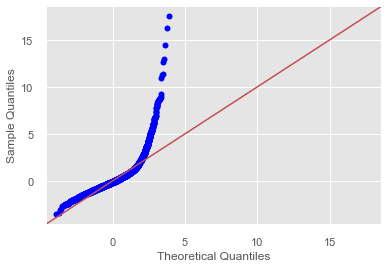

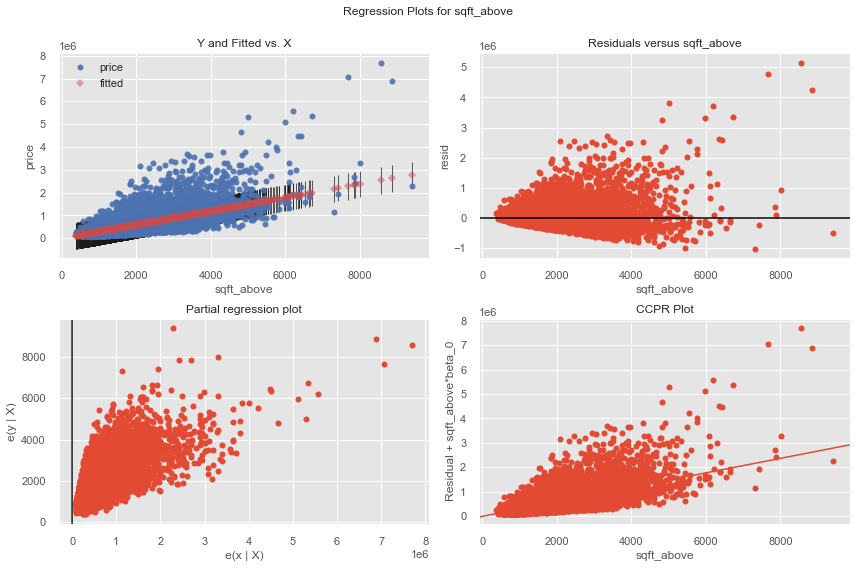

In [41]:
# Q-Q plot and 
fig = sm.graphics.qqplot(basicmodel.resid, line='45',fit=True);
#fig.savefig('Basic_model_qqplot')
sm.graphics.plot_regress_exog(basicmodel, 'sqft_above', fig=plt.figure(figsize=(12,8)));

> The base model shows that sqft_above(independent variable) has high correlation with price(dependent variable). In Basic linear model high R-squared value (0.80) and low P-value(0) shows there is a relationship between variables. Q-Q data plot is not normally distributed and scatter plots are very homoscedastic.However this model is inconclusive because there is not enough data and sqft_living is too highly correlated with the other predictors.

### Feature Scaling & Normalization

In [42]:
# full sample target variable and independent variable
y =kc_df_preprocessed['price']
X = kc_df_preprocessed.drop('price', axis=1)

In [43]:
# creating and initializing scaler using MinMax
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [44]:
# performing the transform in the data Normalization between 0 and 1
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [45]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.06250,0.066667,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742
1,0.06250,0.233333,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027
2,0.03125,0.066667,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513
3,0.09375,0.333333,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996
4,0.06250,0.200000,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871


### Multilinear regression

In [46]:
kc_df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


In [47]:
#splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [48]:
#create linear Regression 
model1 = LinearRegression()

#train the model using the training set
model1.fit(X_train, y_train)

LinearRegression()

In [49]:
#model prediction on train data
y_pred = model1.predict(X_train)

#### Model Evaluation

In [50]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6967475592159201
Adjusted R^2: 0.6964412436191685
MAE: 126142.1164482248
MSE: 40624962376.815575
RMSE: 201556.35037580825


> Training data the R-sqruare value 0.69 with a respectable measure of accuracy. Adjusted R-square is also 0.69 degrees of fredom that loosing not too  much extra variables in there.

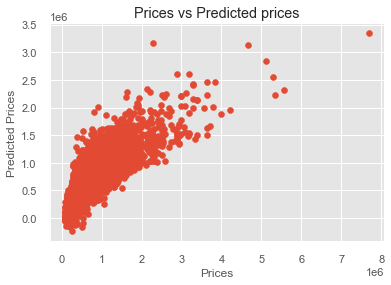

In [51]:
# Visualization the difference between actual price and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

>Looing at the predtiction of the price not a straight line so it looks like non-linear effect 

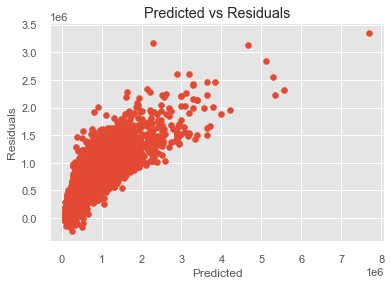

In [52]:
# inspecting residuals
plt.scatter(y_train, y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.show()

> Looking at the predicted price against the residuals level of the error around the 5 million to 8 million side.

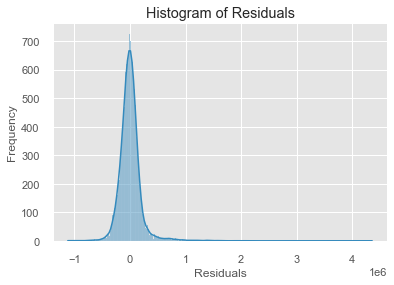

In [53]:
#checking normality error
sns.histplot(y_train - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

I do have some error interms of normality. To improve the accuracy we have to remove the outliers.However sometimes removing outliers could cause to lose valuable information.

#### Model Evaluation for OLS

In [54]:
#predicting test data with model
y_test_pred = model1.predict(X_test)

In [55]:
#model evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6925715106076155
Adjusted R^2: 0.6916379642363347
MAE: 125783.43151844373
MSE: 43034335176.931114
RMSE: 207447.18647629596


> Cheking the test size error determine the how well the model. I still get in 0.69 meaning is in sample and the outer sample relatively reboost. That could drop off a lot. If it was, the model is not performing well.

### Cross Validation

In [56]:
# checking models performance error
scores = cross_val_score(model1, X_test, y_test, cv=3)

In [57]:
# root mean square error
display(scores)
display(scores.mean())
display(scores.std())

array([0.65386513, 0.70625005, 0.67954479])

0.6798866570483634

0.021387420066969805

> I created base model with a cross var score 70%, using this score as baseline. Let's see how much I can improve my model considering the score.

### Features Importance

In [58]:
# checking coefficence
model1.coef_

array([-1212538.84604401,   325047.18443293,   227326.69858022,
          12770.56222407,   606065.57437033,   187004.24386319,
         133954.08675408,   977052.42886255,  1578646.78084417,
         728111.30632948,  -282158.77936503,    46674.81101316,
         340912.99962937,  -145260.99655178,   186006.63783596,
        -342451.87571441])

In [59]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
zipdata = zip(X.columns, model1.coef_)

In [61]:
sorted(list(zipdata), key=lambda x : x[1])

[('bedrooms', -1212538.846044015),
 ('sqft_lot15', -342451.8757144073),
 ('yr_built', -282158.77936503245),
 ('long', -145260.99655178218),
 ('floors', 12770.56222407041),
 ('yr_renovated', 46674.81101315951),
 ('condition', 133954.08675407906),
 ('sqft_living15', 186006.63783595857),
 ('view', 187004.243863189),
 ('sqft_lot', 227326.69858022328),
 ('bathrooms', 325047.184432929),
 ('lat', 340912.99962936755),
 ('waterfront', 606065.5743703333),
 ('sqft_basement', 728111.306329484),
 ('grade', 977052.4288625527),
 ('sqft_above', 1578646.7808441708)]

In [63]:
X = kc_df_preprocessed.drop('price', axis=1)

In [64]:
model1 = sm.OLS(y, X).fit()

In [65]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.206e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                        0.00
Time:                        13:48:55   Log-Likelihood:                     -2.8864e+05
No. Observations:               21143   AIC:                                  5.773e+05
Df Residuals:                   21127   BIC:                                  5.774e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.588e+04   1959.884    -18.306      0.000   -3.97e+04    -3.2e+04
bathrooms      4.597e+04   3364.999     13.662      0.000    3.94e+04    5.26e+04
sqft_lot          0.0206      0.050      0.414      0.679      -0.077       0.118
floors         1.578e+04   3647.208      4.326      0.000    8627.776    2.29e+04
waterfront     6.321e+05   1.88e+04     33.700      0.000    5.95e+05    6.69e+05
view           5.301e+04   2178.158     24.339      0.000    4.87e+04    5.73e+04
condition      2.579e+04   2392.447     10.780      0.000    2.11e+04    3.05e+04
grade          1.085e+05   2177.628     49.819      0.000    1.04e+05    1.13e+05
sqft_above      167.7856      3.752     44.715      0.000     160.431     175.141
sqft_basement   158.4474      4.504     35.181      0.000     149.620     167.275
yr_built      -3235.6443     65.671    -49.271      0.000   -3364.364   -3106.924
yr_renovated     17.8113      4.102      4.342      0.000       9.772      25.851
lat            4.833e+05   1.03e+04     46.998      0.000    4.63e+05    5.03e+05
long           1.421e+05   4216.308     33.711      0.000    1.34e+05     1.5e+05
sqft_living15    12.8313      3.476      3.691      0.000       6.017      19.645
sqft_lot15       -0.5378      0.076     -7.080      0.000      -0.687      -0.389
==============================================================================
Omnibus:                    18064.044   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1751674.038
Skew:                           3.610   Prob(JB):                         0.00
Kurtosis:                      47.003   Cond. No.                     6.69e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

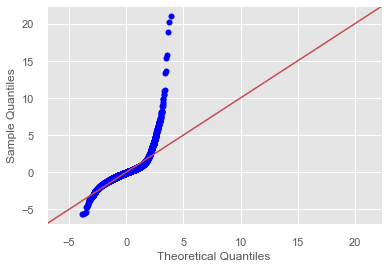

In [66]:
sm.graphics.qqplot(model1.resid, line='45',fit=True);


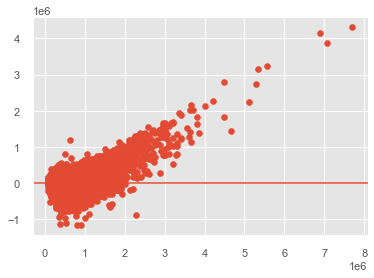

In [67]:
plt.scatter(kc_df_preprocessed['price'],model1.resid)
plt.axhline(0);

#### Model1

> The first model R-squared value is 0.90 which is higher then my basic model(.79).P-value for each feature in the first model is 0. The scatter plot is a lot more homoscedastic than the basic model and the Q-Q plot still shows that the data is not normally distributed.  I can assume that house price increases in a non-linear fashion.

In [68]:
# drop high P-value column
X.drop(['sqft_lot', 'floors'], axis=1, inplace = True)

### Building Constant Model

> The estimate of the intercept is a function of the added constant(s). The relationships between the several intercepts of those models involving the transformed values of the variables and that of the original model are then obtained so to facilitate comparison and referencing.

In [69]:
# adding a constant Allowing the slope to move along the y axis
predictors = sm.add_constant(X)
const_model = sm.OLS(y, predictors).fit()
const_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3453.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:49:35   Log-Likelihood:            -2.8839e+05
No. Observations:               21143   AIC:                         5.768e+05
Df Residuals:                   21128   BIC:                         5.769e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.666e+07   1.59e+06    -23.129      0.000   -3.98e+07   -3.36e+07
bedrooms       -3.45e+04   1936.049    -17.818      0.000   -3.83e+04   -3.07e+04
bathrooms      4.273e+04   3207.852     13.320      0.000    3.64e+04     4.9e+04
waterfront     6.294e+05   1.85e+04     33.968      0.000    5.93e+05    6.66e+05
view           5.061e+04   2152.842     23.510      0.000    4.64e+04    5.48e+04
condition      3.144e+04   2370.907     13.260      0.000    2.68e+04    3.61e+04
grade          9.817e+04   2191.094     44.806      0.000    9.39e+04    1.02e+05
sqft_above      180.0164      3.687     48.822      0.000     172.789     187.244
sqft_basement   147.0554      4.260     34.521      0.000     138.706     155.405
yr_built      -2482.9779     71.249    -34.849      0.000   -2622.631   -2343.325
yr_renovated     24.9750      4.061      6.150      0.000      17.015      32.935
lat            5.575e+05   1.06e+04     52.547      0.000    5.37e+05    5.78e+05
long          -1.171e+05    1.2e+04     -9.751      0.000   -1.41e+05   -9.36e+04
sqft_living15    27.1017      3.463      7.825      0.000      20.313      33.890
sqft_lot15       -0.2706      0.054     -4.980      0.000      -0.377      -0.164
==============================================================================
Omnibus:                    18057.803   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1802412.118
Skew:                           3.597   Prob(JB):                         0.00
Kurtosis:                      47.657   Cond. No.                     3.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

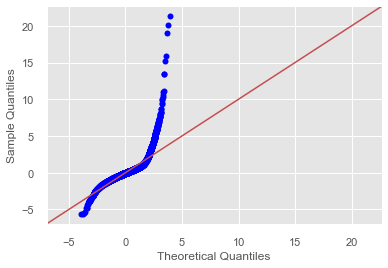

In [70]:
sm.graphics.qqplot(const_model.resid, line='45',fit=True);

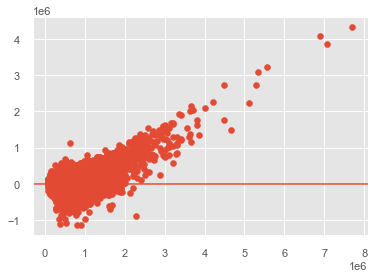

In [71]:
plt.scatter(y, const_model.resid)
plt.axhline(0);

### Final Model

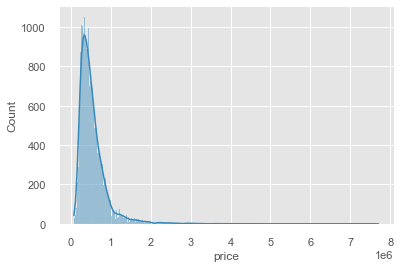

In [72]:
# not normally distributed
sns.histplot(y, kde=True);

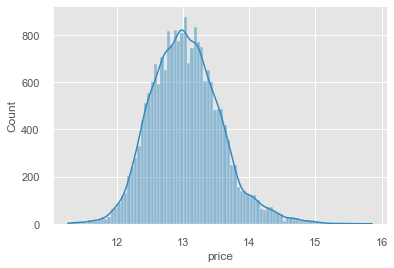

In [73]:
# log normal distribution
y_scld = np.log(y)
sns.histplot(y_scld, kde=True);

In [78]:
logmodel = sm.OLS(y_scld, predictors).fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     4900.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:20:48   Log-Likelihood:                -1154.9
No. Observations:               21143   AIC:                             2340.
Df Residuals:                   21128   BIC:                             2459.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -56.9501      1.996    -28.537      0.000     -60.862     -53.038
bedrooms         -0.0125      0.002     -5.133      0.000      -0.017      -0.008
bathrooms         0.0870      0.004     21.547      0.000       0.079       0.095
waterfront        0.3748      0.023     16.067      0.000       0.329       0.421
view              0.0604      0.003     22.297      0.000       0.055       0.066
condition         0.0642      0.003     21.501      0.000       0.058       0.070
grade             0.1651      0.003     59.849      0.000       0.160       0.171
sqft_above        0.0001   4.64e-06     31.797      0.000       0.000       0.000
sqft_basement     0.0001   5.36e-06     23.101      0.000       0.000       0.000
yr_built         -0.0030   8.97e-05    -33.677      0.000      -0.003      -0.003
yr_renovated   4.497e-05   5.11e-06      8.796      0.000     3.5e-05     5.5e-05
lat               1.3680      0.013    102.420      0.000       1.342       1.394
long             -0.0717      0.015     -4.737      0.000      -0.101      -0.042
sqft_living15   9.42e-05   4.36e-06     21.604      0.000    8.57e-05       0.000
sqft_lot15      1.41e-07   6.84e-08      2.061      0.039    6.88e-09    2.75e-07
==============================================================================
Omnibus:                      352.816   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.209
Skew:                          -0.004   Prob(JB):                    2.22e-155
Kurtosis:                       3.899   Cond. No.                     3.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

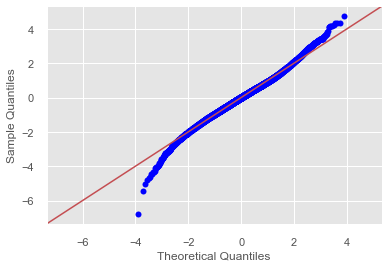

In [79]:
fig = sm.graphics.qqplot(logmodel.resid, line='45',fit=True);
#fig.savefig('final_qqplot')

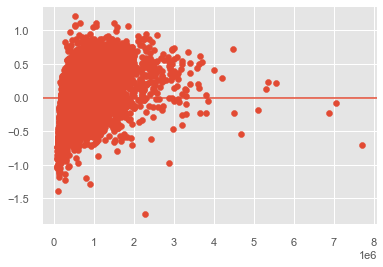

In [80]:
plt.scatter(y,logmodel.resid)
plt.axhline(0);

In [81]:
logmodel.params.sort_values().round(4)

const           -56.9501
long             -0.0717
bedrooms         -0.0125
yr_built         -0.0030
sqft_lot15        0.0000
yr_renovated      0.0000
sqft_living15     0.0001
sqft_basement     0.0001
sqft_above        0.0001
view              0.0604
condition         0.0642
bathrooms         0.0870
grade             0.1651
waterfront        0.3748
lat               1.3680
dtype: float64

### Final Model

> On the final model the R-squared score dropped to 0.765 and all predictors in the final dataframe have a low p-value. The Q-Q plot shows the model is normally distributed and the scatter plot shows the data is homoscedastic.

##  Conclusion 

- Comparing the base and final model our R-square value has dropped from 0.90 to 0.76. Also the base model wasnt normally distributed.In the final model using log transform help makes the model normally distributed.
- The latitude coefficient is 1.2565 which means I assume, if the house around the common areas the property the price should be higher than other areas.
- The waterfront coefficent is 0.3791 and the second highest, if the house is waterfront property the price should be considerably higher than if it was not waterfront
- The King county grading system also impacted the house price. The coeffient is 0.1830 meaning it's the fourth most important feature.
- The sqft_above column was the highest correlated with price and increase house value.Bigger the houses the more they cost.

### Next Step

 > After seeing there is an outliers next step would be to evaluate for other outlier and revome them for a better model
 > Additional analysis could provide further insights into how zipcode impacted on the house price
 > Determining further in the data accuracy 
 > If I have time I will also try polynomial regression model